In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge_IIoTset__DatasetFL.pdf
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Readme.txt
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/MITM (ARP spoofing + DNS) Attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/XSS_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_UD

In [2]:
df_dnn = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [3]:
df_ml = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv', low_memory=False)

In [4]:
df_dnn = df_dnn.drop_duplicates()

In [5]:
df_ml = df_ml.drop_duplicates()

In [6]:
df_dnn['Attack_type'].value_counts()

Attack_type
Normal                   1615643
DDoS_UDP                  121567
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
Fingerprinting              1001
MITM                         400
Name: count, dtype: int64

In [7]:
df_ml['Attack_type'].value_counts()

Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
Fingerprinting            1001
MITM                       400
Name: count, dtype: int64

In [8]:
attack_percentages = df_ml['Attack_type'].value_counts(normalize=True) * 100
attack_percentages = attack_percentages.round(2)
print(attack_percentages)

Attack_type
Normal                   15.48
DDoS_UDP                  9.24
DDoS_ICMP                 8.98
Ransomware                6.96
DDoS_HTTP                 6.73
SQL_injection             6.57
Uploading                 6.54
DDoS_TCP                  6.53
Backdoor                  6.49
Vulnerability_scanner     6.42
Port_Scanning             6.42
XSS                       6.40
Password                  6.36
Fingerprinting            0.64
MITM                      0.25
Name: proportion, dtype: float64


In [9]:
df = pd.concat([df_ml, df_dnn], ignore_index=True)
df = df.drop_duplicates()

In [10]:
# Define attack categories
attack_categories = {
    'Normal' : 'Normal',
    'DDoS_UDP': 'dos',
    'DDoS_ICMP': 'dos',
    'DDoS_HTTP': 'dos',
    'DDoS_TCP': 'dos',
    'Port_Scanning': 'information_gathering',
    'Fingerprinting': 'information_gathering',
    'Vulnerability_scanner': 'information_gathering',
    'SQL_injection': 'injection',
    'XSS': 'injection',
    'Uploading': 'injection',
    'Backdoor': 'malware',
    'Password': 'malware',
    'Ransomware': 'malware',
    'MITM': 'MITM' 
}

In [11]:
df['Attack_categories'] = df['Attack_type'].map(attack_categories)

In [12]:
df['Attack_categories'].value_counts(normalize = True) *100

Attack_categories
Normal                   72.829673
dos                      15.235214
injection                 4.721989
malware                   3.873986
information_gathering     3.321107
MITM                      0.018031
Name: proportion, dtype: float64

In [13]:
df['Attack_categories'].value_counts() 

Attack_categories
Normal                   1615644
dos                       337976
injection                 104752
malware                    85940
information_gathering      73675
MITM                         400
Name: count, dtype: int64

In [14]:
df['Attack_categories'] = df['Attack_categories'].replace('MITM', 'information_gathering')
df['Attack_categories'].value_counts()

Attack_categories
Normal                   1615644
dos                       337976
injection                 104752
malware                    85940
information_gathering      74075
Name: count, dtype: int64

In [16]:
min_class_size = df['Attack_categories'].value_counts().min()
df = df.groupby('Attack_categories').apply(lambda x: x.sample(min_class_size, random_state=42))
df = df.reset_index(drop=True)

/tmp/ipykernel_30/1123781917.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Attack_categories').apply(lambda x: x.sample(min_class_size, random_state=42))


In [17]:
df['Attack_categories'].value_counts()

Attack_categories
Normal                   74075
dos                      74075
information_gathering    74075
injection                74075
malware                  74075
Name: count, dtype: int64

In [18]:
df['Attack_label'].value_counts()

Attack_label
1    296300
0     74075
Name: count, dtype: int64

In [19]:
features_with_one_unique_value = list(df.columns[df.nunique() == 1])

In [20]:
features_with_one_unique_value

['icmp.unused', 'http.tls_port', 'dns.qry.type', 'mqtt.msg_decoded_as']

In [21]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4","dns.qry.name",
         "http.file_data","http.request.full_uri","icmp.transmit_timestamp","arp.hw.size","icmp.seq_le",
         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport","arp.opcode","icmp.checksum",
         "tcp.dstport", "udp.port", "mqtt.msg"]+features_with_one_unique_value
df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [24]:
X = df. drop(['Attack_type','Attack_categories'],axis=1)
y = df['Attack_categories']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

In [27]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)
X_val = robust_scaler.transform(X_val)


In [28]:
X_train_shaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_shaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
input_shape=X_train_shaped.shape[1:]

In [30]:
input_shape

(77, 1)

In [31]:
num_classes=len(np.unique(y))

In [32]:
num_classes

5

In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def evaluate(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  return {
        "Accuracy": round(accuracy,2),
        "Recall": round(recall,2),
        "Precision": round(precision,2),
        "F1 Score": round(f1,2)
    }

In [34]:
from  tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

In [35]:
y_train_cat.shape

(215604, 5)

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

lstm_model = Sequential()
lstm_model.add(LSTM(units=256, activation='tanh', input_shape=input_shape, return_sequences=True))
lstm_model.add(LSTM(128, activation='tanh'))
lstm_model.add(Dense(num_classes, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 77, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,957 (1.76 MB)

 Trainable params: 461,957 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from keras.metrics import Recall
recall_metric = Recall()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[recall_metric])

In [57]:
lstm_model.fit(X_train, y_train_cat,
               epochs=40,
               batch_size=256,
               validation_data=(X_val, y_val_cat),
               callbacks=[early_stopping])

Epoch 1/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - loss: 0.1198 - recall: 0.9363 - val_loss: 0.1183 - val_recall: 0.9354
Epoch 2/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - loss: 0.1176 - recall: 0.9376 - val_loss: 0.1360 - val_recall: 0.9250
Epoch 3/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - loss: 0.1311 - recall: 0.9321 - val_loss: 0.1167 - val_recall: 0.9372
Epoch 4/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 0.1167 - recall: 0.9377 - val_loss: 0.1202 - val_recall: 0.9374
Epoch 5/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - loss: 0.1256 - recall: 0.9358 - val_loss: 0.1160 - val_recall: 0.9420
Epoch 6/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - loss: 0.1205 - recall: 0.9372 - val_loss: 0.1158 - val_recall: 0.9424
Epoch 7/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - loss: 0.1162 - recall: 0.9404 - val_loss: 0.1220 - val_recall: 0.9384
Epoch 8/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - loss: 0.1170 - recall: 0.9389 - val_loss: 0.1147 - val_recall:

In [58]:
from sklearn.metrics import classification_report
predictions = lstm_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

2106/2106 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [59]:
report = evaluate(y_test, predicted_labels)
print(report)

{'Accuracy': 0.95, 'Recall': 0.95, 'Precision': 0.95, 'F1 Score': 0.95}


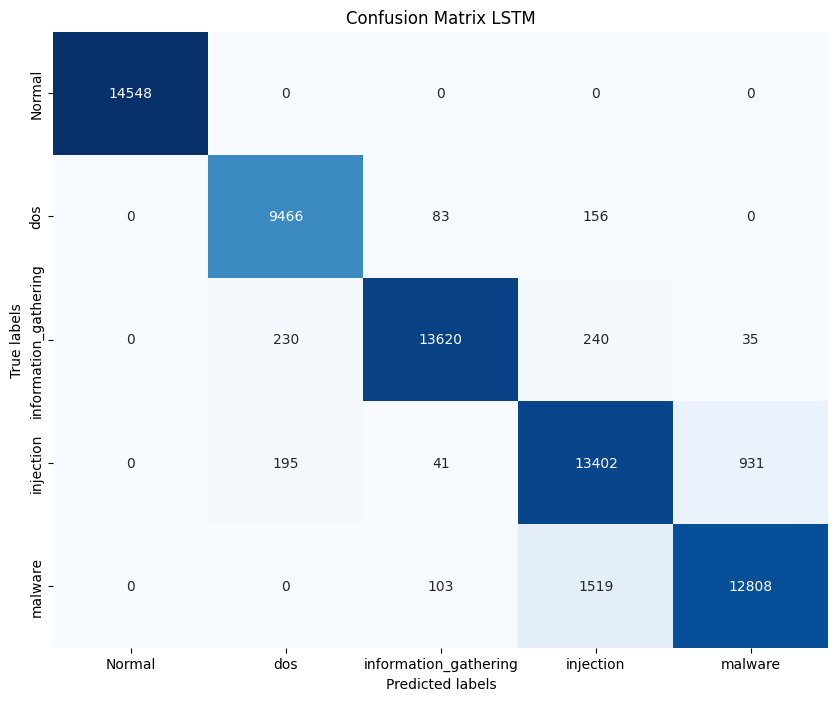

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_ 

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix LSTM')
plt.show()

In [43]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow import keras

inputs = keras.Input(shape=input_shape)

x = Conv1D(filters=32, kernel_size=3, padding="same", activation='relu')(inputs)
x = MaxPooling1D(strides=2)(x)

x = Conv1D(filters=64, kernel_size=3, padding="same", activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

cnn_model = keras.Model(inputs=inputs, outputs=outputs)


In [44]:
cnn_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 77, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 77, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 38, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,077 (418.27 KB)

 Trainable params: 107,077 (418.27 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=[recall_metric])

In [46]:
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [47]:
from keras.callbacks import EarlyStopping
EPOCHS=40
BATCH_SIZE=256
history = cnn_model.fit(X_train, y_train_cat,
                    validation_data=(X_val, y_val_cat),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=early_stopping_cnn)

Epoch 1/40


I0000 00:00:1732465931.062239     221 service.cc:145] XLA service 0x7945d005b450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732465931.062314     221 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732465931.062318     221 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 60/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 109.2536 - recall: 0.8469

I0000 00:00:1732465933.927108     221 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


843/843 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 25.1534 - recall: 0.7391 - val_loss: 1.5074 - val_recall: 0.7045
Epoch 2/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.3790 - recall: 0.7428 - val_loss: 0.5655 - val_recall: 0.7745
Epoch 3/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3826 - recall: 0.7582 - val_loss: 0.4350 - val_recall: 0.7984
Epoch 4/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.3451 - recall: 0.7748 - val_loss: 1.7021 - val_recall: 0.7621
Epoch 5/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8903 - recall: 0.7828 - val_loss: 2.9747 - val_recall: 0.7424
Epoch 6/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9957 - recall: 0.8000 - val_loss: 2.7157 - val_recall: 0.8043
Epoch 7/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3515 - recall: 0.8102 - val_loss: 0.3308 - val_recall: 0.8164
Epoch 8/40
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3690 - recall: 0.8228 - val_loss: 0.3312 - val_recall: 0.8141
Epoch 9/40
843/84

In [48]:
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

2106/2106 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [49]:
report = evaluate(y_test, predicted_labels_cnn)
print(report)

{'Accuracy': 0.88, 'Recall': 0.88, 'Precision': 0.89, 'F1 Score': 0.88}


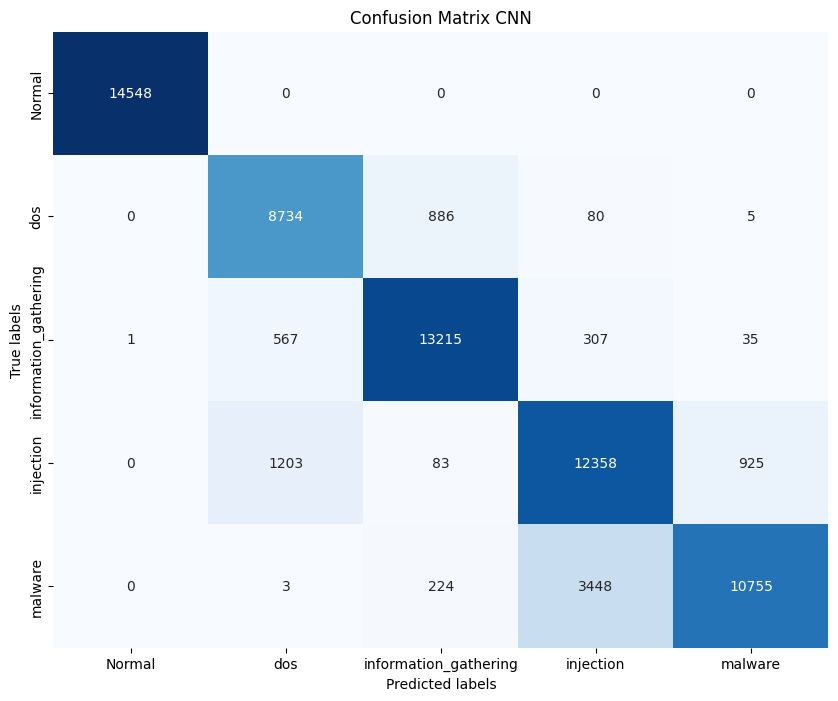

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_ 

conf_matrix = confusion_matrix(y_test, predicted_labels_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CNN')
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_cat)

RandomForestClassifier()

In [52]:
y_test_pred_rf = rf_clf.predict(X_test)

y_test_pred_rf = np.argmax(y_test_pred_rf, axis=1)

eval_result = evaluate(y_test,y_test_pred_rf)
print(eval_result)

{'Accuracy': 0.94, 'Recall': 0.94, 'Precision': 0.94, 'F1 Score': 0.94}


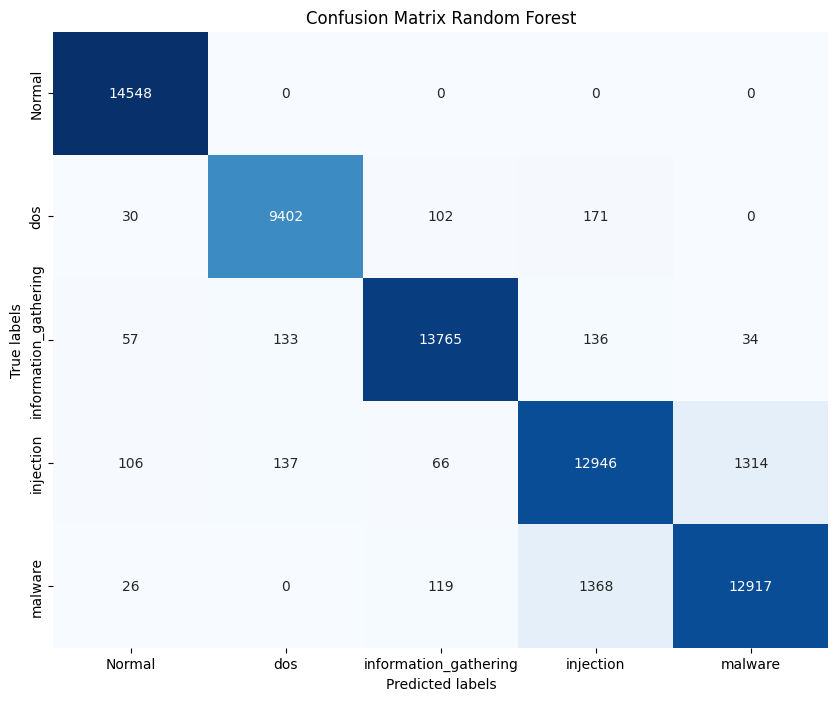

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_ 

conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train_cat)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred_xgb_1 = xgb.predict(X_test)
y_pred_xgb_1 = np.argmax(y_pred_xgb_1, axis=1)

eval_result = evaluate(y_test,y_pred_xgb_1)
print(eval_result)

{'Accuracy': 0.95, 'Recall': 0.95, 'Precision': 0.95, 'F1 Score': 0.95}


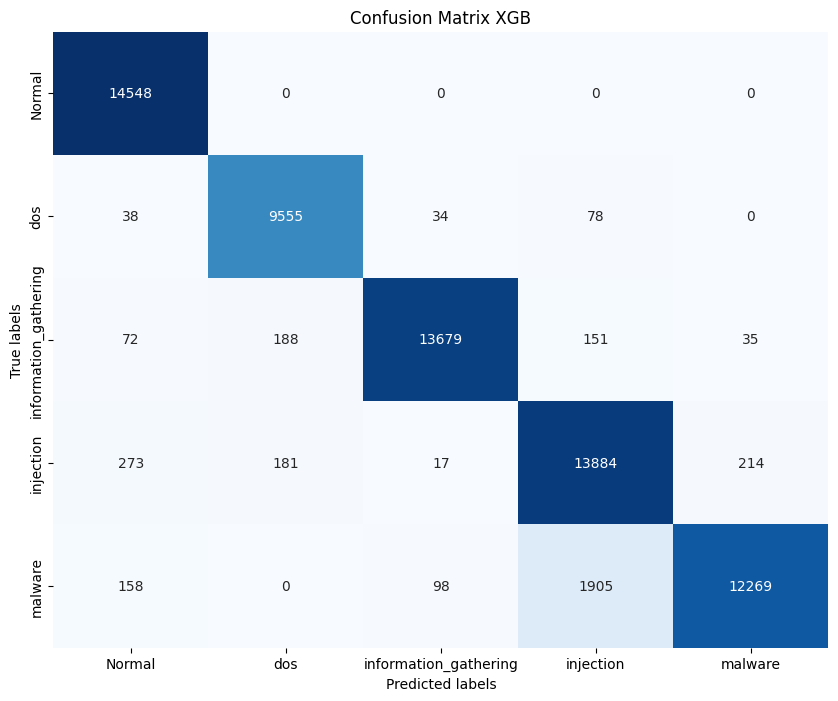

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_  # Assuming label_encoder is your label encoder object

conf_matrix = confusion_matrix(y_test, y_pred_xgb_1)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGB')
plt.show()